# Imports

In [1]:
from dataset import MyData
from model import Net
from config import device
from helper import downscale_map

import torch
import numpy as np
import matplotlib.pyplot as plt

Selected devie is cuda:0


# Map cascade

## Simple loop

#### Get image

In [5]:
dataset1 = MyData(path_or_img='./imgs/2_r.png', data_mode='path', mode_3d='cylinder', radius=1, reduce_fctor=1, need_info=False)
# dataset2 = MyData(path_to_file='./data/sn1996k1905eng.abz', mode='abz', mode_3d='sphere', radius=2, reduce_fctor=1, need_help=False)

dataset_list = [dataset1] #, dataset2]

#### Get map cascades from images

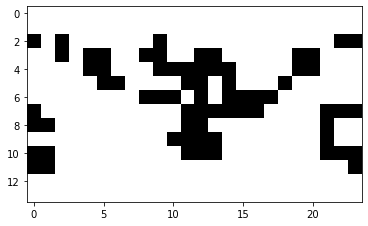

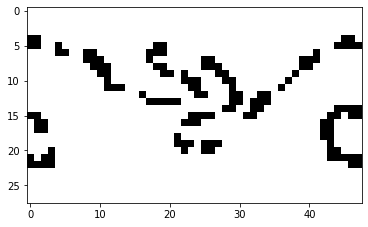

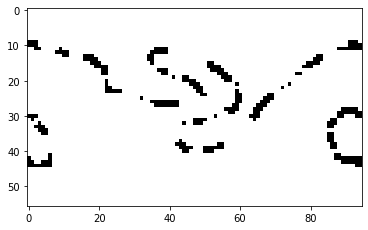

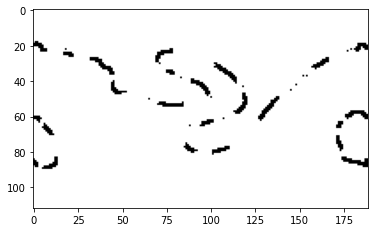

In [6]:
normal_img_array_1 = 1 - np.array(dataset1.img_array, dtype='float64') / 255.
map_cascade_1 = [downscale_map(normal_img_array_1, 2 ** x) for x in range(4, 0, -1)]

# convolve = np.vectorize(np.convolve, signature='(n),(m)->(k)')
# map_cascade = [(1 - convolve(convolve(normal_img_array, np.ones((i))).T, np.ones((i))).T) > 0 for i in range(200, 0, -50)]

for cas_map in map_cascade_1:
    plt.imshow(cas_map, cmap = "gray")
    plt.show()

####  Training the model

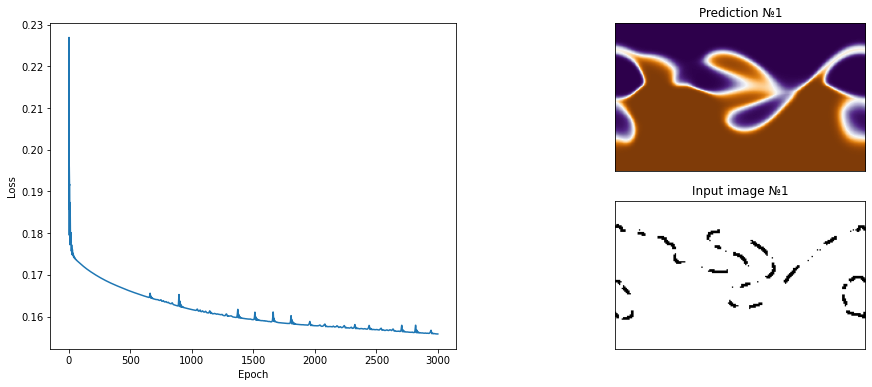

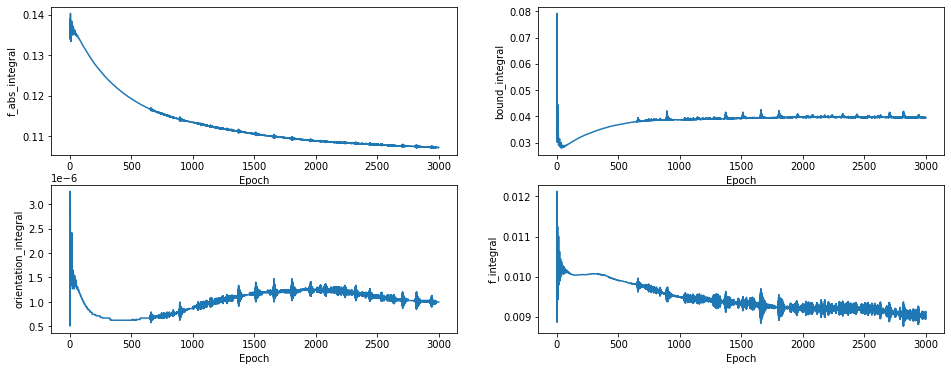

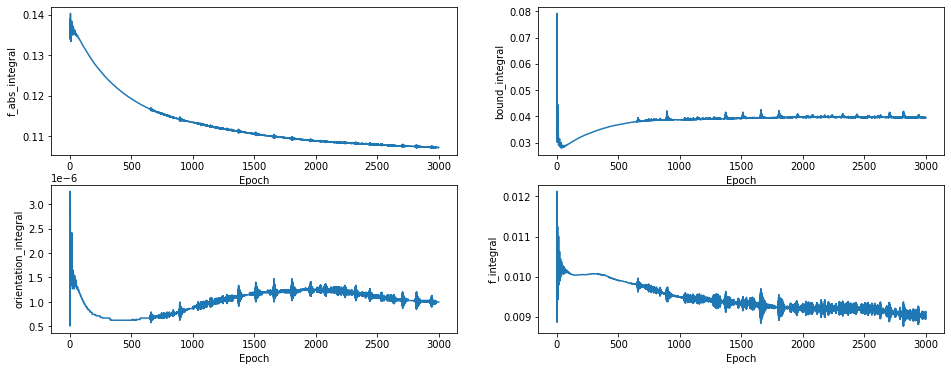

In [8]:
# for i, cas_map in enumerate(zip(map_cascade_1, map_cascade_2)):
#     dataset1 = MyData(path_to_file=255 * cas_map[0], mode='2img', mode_3d='cylinder', radius=5, reduce_fctor=1, need_help=False)
#     dataset2 = MyData(path_to_file=255 * cas_map[1], mode='2img', mode_3d='cylinder', radius=2, reduce_fctor=1, need_help=False)

#     dataset_list = [dataset1, dataset2]
#     model = Net(dataset_list=dataset_list, lr=1e-3)
#     model.to(device)
#     # summary(model, input_size=(sum([len(x) for x in model.data_list]), 3))
#     if i:
#         model.load_state_dict(torch.load(f'./state_dcit/{i - 1}_2_r.pt'))
#     _ = model.test_model(model.data_list, need_plot=True)
#     # dataset1.show_image()
#     model.start_training(num_epochs=3e+3, my_weight=0.1)
#     model.show_loss_items()
#     model.save_state_dict(f'./state_dcit/{i}_2_r.pt')
#     input()

for i, cas_map in enumerate(map_cascade_1):
    dataset1 = MyData(path_or_img=255 * cas_map, data_mode='img', mode_3d='cylinder', radius=1, reduce_fctor=1, need_info=False)

    dataset_list = [dataset1]
    model = Net(dataset_list=dataset_list, lr=1e-3)
    model.to(device)
    # summary(model, input_size=(sum([len(x) for x in model.data_list]), 3))
    if i:
        model.load_state_dict(torch.load(f'./state_dict/{i}_2_r.pt'))
    _ = model.test_model(model.data_list, need_plot=True)
    # dataset1.show_image()
    model.start_training(num_epochs=3e+3, my_weight=0.1, need_plot=True, need_save=False)
    model.show_loss_items()
    model.save_state_dict(f'./state_dict/{i+1}_2_r.pt')
    # input()

## Using markup

In [9]:
dataset = MyData(path_or_img='./data/sn1996k1905eng.abz', data_mode='abz', mode_3d='cylinder', radius=5, reduce_fctor=1)

Text(0.5, 1.0, 'pm')

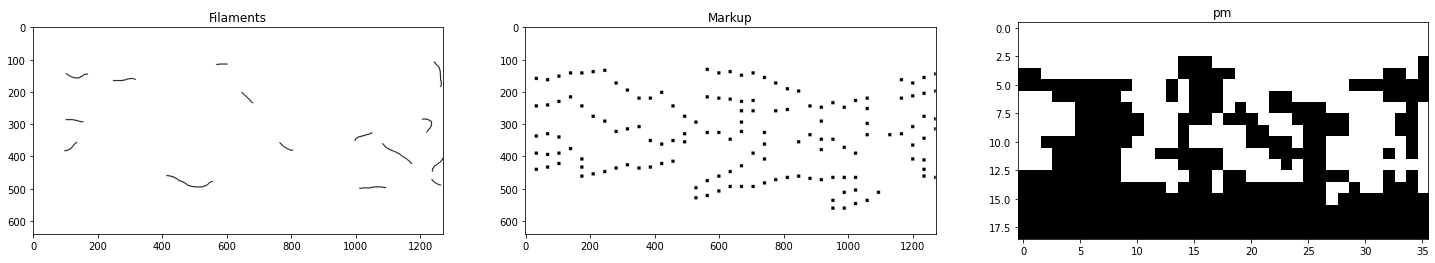

In [10]:
# plot dataset.help_array and dataset.img_array to see the difference between them
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.imshow(dataset.img_array, cmap = "gray")
plt.title('Filaments')

plt.subplot(1, 3, 2)
plt.imshow(dataset.smap.markup, cmap = "gray")
plt.title('Markup')

plt.subplot(1, 3, 3)
plt.imshow(dataset.smap.pm, cmap = "gray")
plt.title('pm')

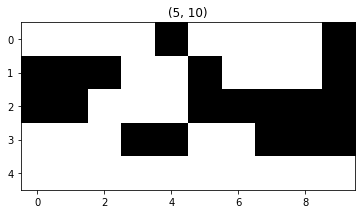

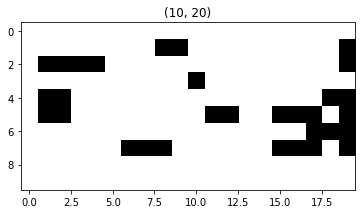

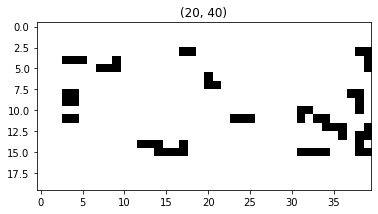

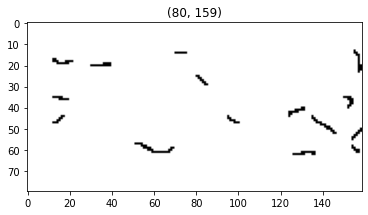

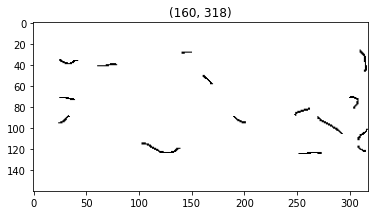

In [11]:
himg = 1 - np.array(dataset.smap.filaments, dtype='float64') / 255.
map_cascade = [downscale_map(himg, 2 ** x) for x in [7, 6, 5, 3, 2]]

for cas_map in map_cascade:
    plt.imshow(cas_map, cmap = "gray")
    plt.title(f'{cas_map.shape}')
    plt.show()

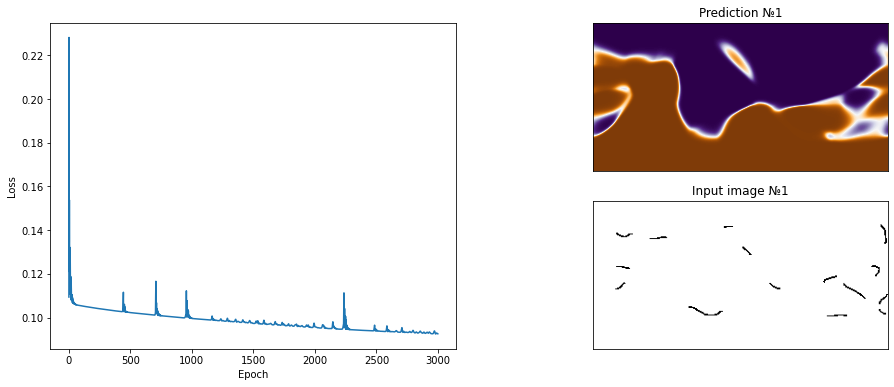

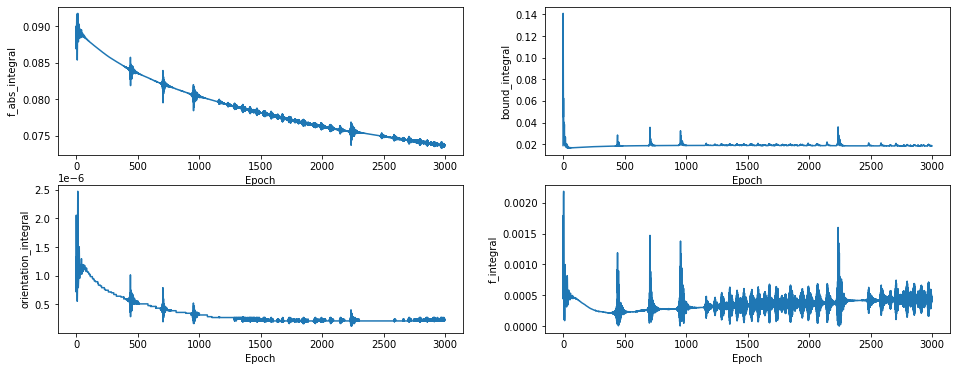

In [13]:
for i, cas_map in enumerate(map_cascade):
    dataset1 = MyData(path_or_img=255 * cas_map, data_mode='img', mode_3d='cylinder', radius=5, reduce_fctor=1)

    dataset_list = [dataset1]
    model = Net(dataset_list=dataset_list, lr=1e-3)
    model.to(device)
    if i:
        model.load_state_dict(torch.load(f'./state_dict/{i}_cascade_1905_markup.pt'))
    _ = model.test_model(model.data_list, need_plot=True)
    model.start_training(num_epochs=3e+3, my_weight=0.1, need_plot=True, need_save=False)
    model.save_state_dict(f'./state_dict/{i+1}_cascade_1905_markup.pt')
    # input()

## Step-by-step optimization for every map in the cascade

#### Get image

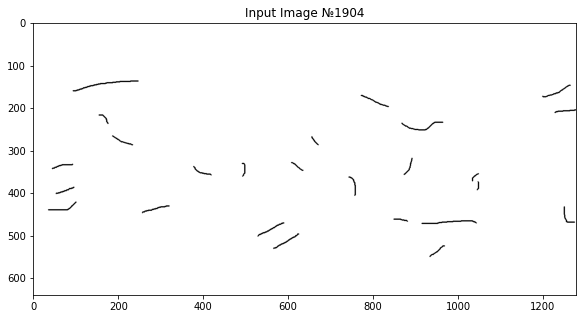

In [4]:
dataset = MyData(path_to_file='./data/sn1996k1904eng.abz', mode='abz', mode_3d='cylinder', radius=5, reduce_fctor=1, need_help=False)

dataset_list = [dataset] #, dataset2]
dataset.show_image()

#### Get map cascade from image

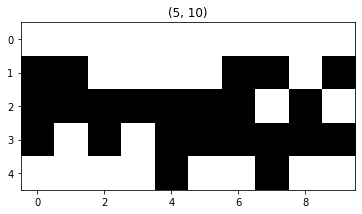

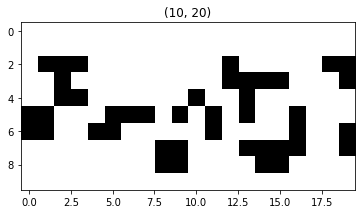

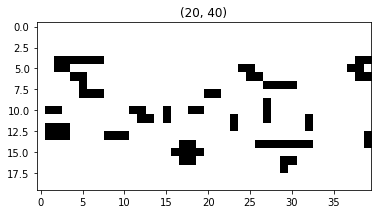

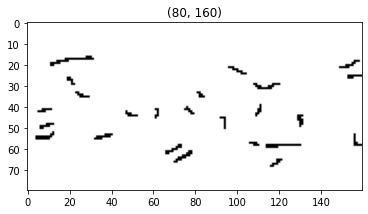

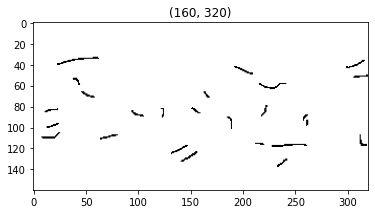

In [7]:
normal_img_array = 1 - np.array(dataset.img_array, dtype='float64') / 255.
map_cascade = [downscale_map(normal_img_array, sq_size=2 ** x) for x in [7, 6, 5, 3, 2]]

# convolve = np.vectorize(np.convolve, signature='(n),(m)->(k)')
# map_cascade = [(1 - convolve(convolve(normal_img_array, np.ones((i))).T, np.ones((i))).T) > 0 for i in range(200, 0, -50)]

for cas_map in map_cascade:
    plt.imshow(cas_map, cmap = "gray")
    plt.title(f'{cas_map.shape}')
    plt.show()

### First map

In [9]:
cas_map = map_cascade[0]

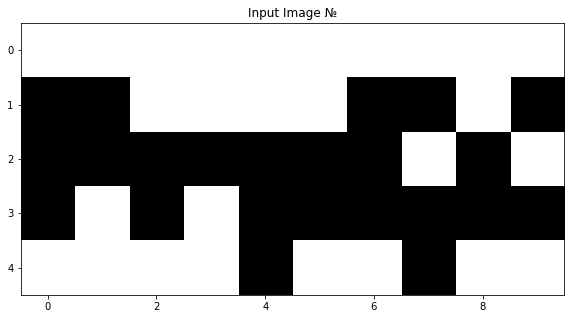

In [10]:
dataset = MyData(path_to_file=255 * cas_map, mode='2img', mode_3d='cylinder', radius=5, reduce_fctor=1, need_help=False)
dataset_list = [dataset]
dataset.show_image()

In [12]:
model = Net(dataset_list=dataset_list, lr=1e-3)
model.to(device)
# summary(model, input_size=(sum([len(x) for x in model.data_list]), 3))

Net(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=6, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=6, out_features=12, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=12, out_features=24, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=24, out_features=1, bias=True)
    (7): Tanh()
  )
)

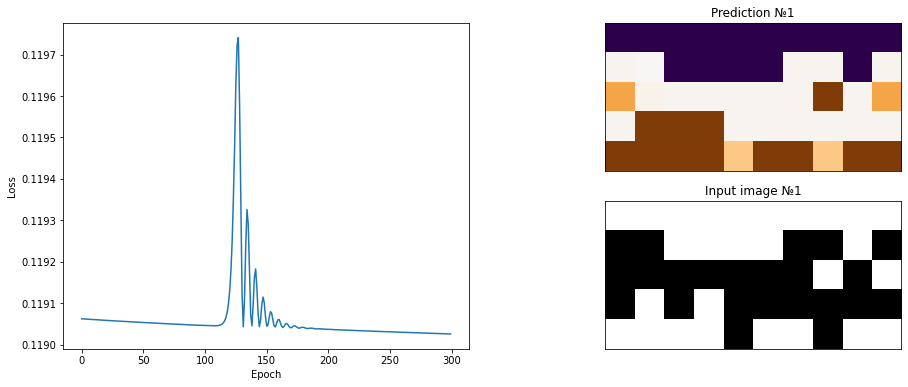

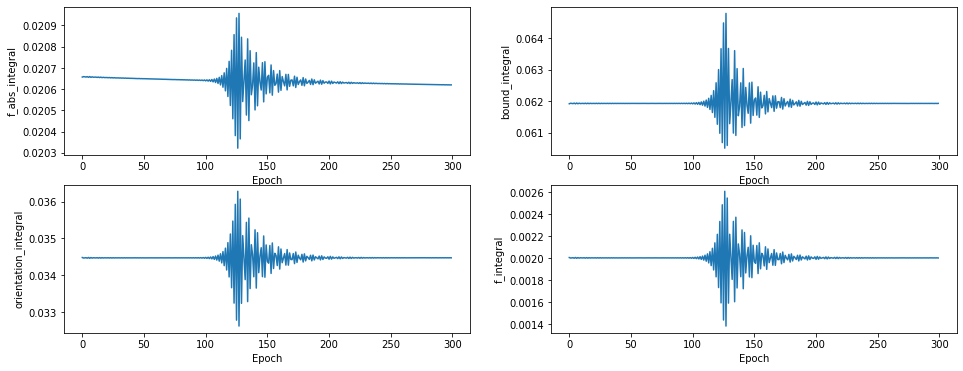

In [14]:
model.start_training(num_epochs=3e+2, my_weight=0.1, need_plot=True, need_save=False)

In [17]:
model.loss_dict.keys()

dict_keys(['loss', 'f_abs_integral', 'bound_integral', 'orientation_integral', 'f_integral'])

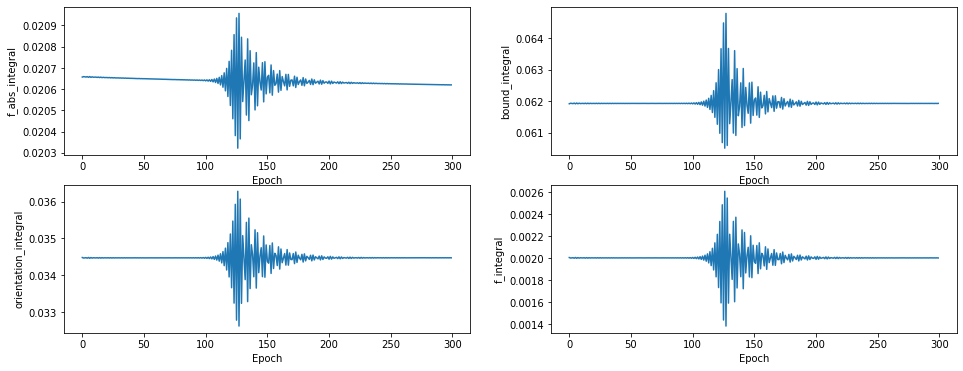

In [18]:
model.show_loss_items()